In [1]:
####WhatsApp Chat Analysis 

In [45]:
# # how to export the whatsapp conversation file
# (1)Open WhatsApp on your mobile device.
# (2)Go to the chat you want to export.
# (3)Tap the three-dot icon(top right corner) 
# (4)(click “More”) 
# (5)select “Export Chat.”
# (6)Tap Without media   note:- select  Include media.(will take huge data) 
# (7)select your email id where u want to download
# (8)Download from your email id.
# (9)The downloaded data is in zip format
# (10)There will be a text file inside the zip 
# the data will be in text file format

In [46]:
# I have done Whatsapp conversations using the steps below:

# Step 1: Detecting {Date} and {Time} tokens
# Step 2: Detecting the {Author} token
# Step 3: Extracting and Combining tokens
# Step 4: Parsing the entire file and handling Multi-Line Messages
# For further steps, we need to perform Exploratory data analysis (EDA)

# Step 5: Performing EDA for analyzing chat data
# Step 6: Overall statistics of WhatsApp chat including Total number of messages, media messages(Omitted) & Total number of URLs
# Step 7: Extracting basic statistics for each Author (user)
# Step 8: Word cloud of most used words in chat
# Step 9: Total number of messages sent by each user
# Step 10: Total messages sent on each day of the week
# Step 11: Most active author of the chat
# Step 12: Most active day in a week
# In next steps, Time series analysis will be performed on chat data

# Step 13: Time whenever the chat was highly active
# Step 14: Date on which the chat was highly active
# Step 15: Converting 12-hour formate to 24 hours will help us for better analysis
# Step 16: Most suitable hour of the day whenever there will be more chances of getting a response from user

In [47]:
# !pip install emoji
#!pip install seaborn
     

In [ ]:
#Import all necessory libraries

In [48]:
import regex
import pandas as pd
import numpy as np
#!pip install emoji
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [6]:
#Step 1: Detecting {Date} and {Time} tokens


In [49]:
def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)\s?(AM|PM|am|pm)?\s?-'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


In [8]:
#Step 2: Detecting the {Author} token

In [50]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+[\s]?[\d]+?[\s]?[\w]+?):',    # First Name + Middle Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',
         '(\w+\s\w+\s\d+\s\w+):',
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False

    
# startsWithAuthor('Saurabh Dada 5 march:')
#shankar more dada aai 3 mar  saurabh data 5 mar vishal 30 june
#Saurabh Dada 5 march:

In [10]:
#Step 3: Extracting and Combining tokens

In [52]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    # print(message)
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
        # print(author,message)
    else:
        author= None
    return date, time, author, message


In [12]:
#Step 4: Parsing the entire file and handling Multi-Line Messages

In [53]:
data = []
#conversation = 'WhatsApp_Chat_with_GC_16_owners_2.txt'
conversation = r'C:\Users\Admin\Desktop\Mithilesh_sir\Mithilesh_sir_files\Together\groupchat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)


In [54]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df.head(1)

,Date,Time,Author,Message
0,2022-04-08,8:58 pm,None,"Group creator created group ""Together 💪"""


In [57]:
df.tail(2)

,Date,Time,Author,Message
2530,2025-01-02,9:37 pm,Avantika Pawar,👏🏻👏🏻
2531,2025-01-02,9:52 pm,Lasalgaon Didi,Kuthe frtay doghe


In [58]:
df["Message"][65]

'Happy birthday vahini saheb....🥧🎉🍫❣️'

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2532 non-null   datetime64[ns]
 1   Time     2532 non-null   object        
 2   Author   2508 non-null   object        
 3   Message  2532 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 79.3+ KB


In [60]:
#----- Authors in the chat
df.Author.unique()
     

array([None, 'F Varsha Tai 11 Oct', 'Manu', 'Akash Dada 22 Sept',
       'Vishal 30 June', 'Ⓟⓡⓐⓙⓐⓚⓣⓐ Ⓣⓐⓛⓞⓛⓔ', 'Priya Tai 19 Jan',
       'Sayali Dii', 'Avantika Pawar', 'Saurabh Dada 5 march',
       'Aai 3 Mar', 'Shankar More Dada', 'Nana', 'Jayshri Aher',
       'Lasalgaon Didi', 'Aaru'], dtype=object)

In [61]:
#------ Displaying total number of messeges in the chat
total_messages = df.shape[0]
print(total_messages)

2532


In [66]:
#----- Displaying omitted media while exporting
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)
     

1628


In [ ]:
#Exploratory Data Analysis(EDA)

In [ ]:
#Step 5: Performing EDA for analyzing chat data

In [67]:
### ----------- Checking shape of dataset.
df.shape

### ---------- Checking basic information of dataset
df.info()

### -------- Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### --------- Checking no. of authors of group
df['Author'].nunique()

### --------- Checking authors of group
df['Author'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2532 non-null   datetime64[ns]
 1   Time     2532 non-null   object        
 2   Author   2508 non-null   object        
 3   Message  2532 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 79.3+ KB


array(['F Varsha Tai 11 Oct', 'Manu', 'Akash Dada 22 Sept',
       'Vishal 30 June', 'Ⓟⓡⓐⓙⓐⓚⓣⓐ Ⓣⓐⓛⓞⓛⓔ', 'Priya Tai 19 Jan',
       'Sayali Dii', 'Avantika Pawar', 'Saurabh Dada 5 march',
       'Aai 3 Mar', 'Shankar More Dada', 'Nana', 'Jayshri Aher',
       'Lasalgaon Didi', 'Aaru'], dtype=object)

In [69]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

### ----------- Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]

### ----------- Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

### ---------- Looking newborn dataset.
df.head()

### ---------- Counting number of letters in each message
df['Letter'] = df['Message'].apply(lambda s : len(s))

### ---------- Counting number of word's in each message
df['Word'] = df['Message'].apply(lambda s : len(s.split(' ')))

### ---------- Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

###--------- Function to count number of media in chat.
MEDIAPATTERN = r''
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

###------- Looking into updated dataset
df.head(1)

,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count
0,2022-12-18,Sunday,10:57 am,F Varsha Tai 11 Oct,👍,1,1,0,2


Step 6: Overall statistics of WhatsApp chat including Total number of messages, media messages(Omitted) & Total number of URLs

In [70]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 2508
Total Number of Media Messages : 1628
Total Number of Links : 24


Step 7: Extracting basic statistics for each Author (user)

In [71]:
l = df.Author.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')

--> Stats of F Varsha Tai 11 Oct <-- 
Total Message Sent :  235
Average Words per Message :  2.060
Total Media Message Sent :  3409
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Manu <-- 
Total Message Sent :  215
Average Words per Message :  2.070
Total Media Message Sent :  3198
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of Akash Dada 22 Sept <-- 
Total Message Sent :  482
Average Words per Message :  2.210
Total Media Message Sent :  8159
Total Links Sent :  11

----------------------------------------------------------n
--> Stats of Vishal 30 June <-- 
Total Message Sent :  421
Average Words per Message :  2.370
Total Media Message Sent :  7501
Total Links Sent :  2

----------------------------------------------------------n
--> Stats of Ⓟⓡⓐⓙⓐⓚⓣⓐ Ⓣⓐⓛⓞⓛⓔ <-- 
Total Message Sent :  83
Average Words per Message :  2.490
Total Media Message Sent :  1901
Total Links Sent :  7

----------

Step 8: Word cloud of most used words in chat

In [27]:
# df['Message'].unique()

In [32]:
def remove_emojis(text):
    emoji_pattern = regex.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & pictographs
        "\U0001F680-\U0001F6FF"  # Transport & map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric shapes
        "\U0001F800-\U0001F8FF"  # Supplemental arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        "\U0001FA00-\U0001FA6F"  # Chess symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and pictographs extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed characters
        "]+",
        flags=regex.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [33]:

# pip install indic-nlp-library

In [72]:
df[df['Message']!='<Media omitted>']['Message']

0                       👍
1                      👌👍
4                     👍👌👌
5         Headphone mala😌
6                   Ho 👍😀
              ...        
2503       Akash and me 👆
2504                   👌👌
2505                   👌👍
2506                 👏🏻👏🏻
2507    Kuthe frtay doghe
Name: Message, Length: 880, dtype: object

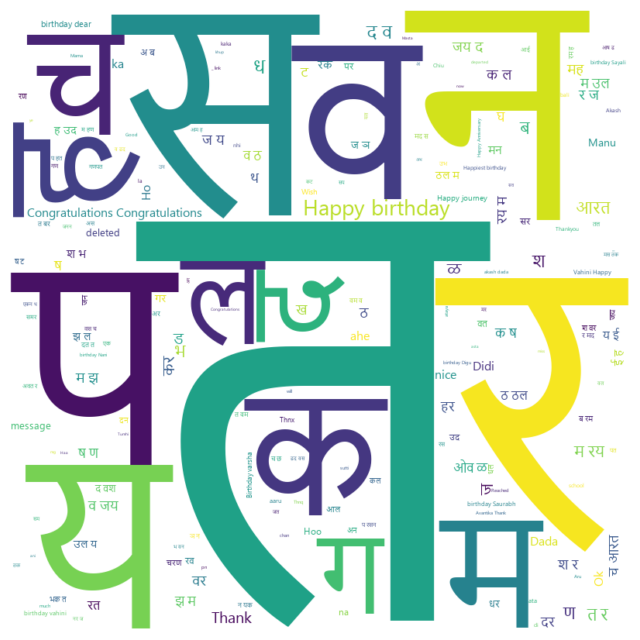

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from indicnlp.tokenize import indic_tokenize

# Define Marathi stopwords
marathi_stopwords = {
    "आहे", "होते", "आणि", "मध्ये", "की", "हे", "तो", "ती", "त्याचा", "त्याची", "त्यांचे",
    "तुम्ही", "आम्ही", "त्या", "का", "कसा", "कधी", "तर", "पण", "फक्त", "माझे"
}

# Combine English and Marathi stopwords
custom_stopwords = STOPWORDS.union(marathi_stopwords)

# Function to clean and remove unwanted characters
def clean_text(text):
    text = re.sub(r'[^\w\s\u0900-\u097F]', '', text)  # Keep only Marathi and English letters
    return text

# Tokenizing function for Marathi using indicnlp
def tokenize_text(text):
    words = indic_tokenize.trivial_tokenize(text, lang='mr')  # Tokenizes properly for Marathi
    return " ".join(words)

# Load your dataset (replace with actual DataFrame and column)
# Example:
# text = " ".join(review for review in df[df['Message'] != '<Media omitted>']['Message'])

text = " ".join(review for review in df[df['Message']!='<Media omitted>']['Message'])

# Clean and tokenize the text
text = remove_emojis(clean_text(text))
text = tokenize_text(text)

# Font path for Nirmala.ttf (Windows path)
font_path = "C:/Windows/Fonts/Nirmala.ttf"  # Make sure it's correct on your machine

# Generate word cloud
wordcloud = WordCloud(
    font_path=font_path,  # Using Nirmala font for proper Marathi support
    stopwords=custom_stopwords,
    background_color="white",
    width=800,
    height=800,
    collocations=True  # Ensures multi-word phrases can appear
).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





Step 9: Total number of messages sent by each user

In [74]:
###------ Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

F Varsha Tai 11 Oct   ->   235
Manu   ->   215
Akash Dada 22 Sept   ->   482
Vishal 30 June   ->   421
Ⓟⓡⓐⓙⓐⓚⓣⓐ Ⓣⓐⓛⓞⓛⓔ   ->   83
Priya Tai 19 Jan   ->   196
Sayali Dii   ->   74
Avantika Pawar   ->   125
Saurabh Dada 5 march   ->   410
Aai 3 Mar   ->   4
Shankar More Dada   ->   70
Nana   ->   45
Jayshri Aher   ->   34
Lasalgaon Didi   ->   54
Aaru   ->   60


Step 10: Total messages sent on each day of the week

In [75]:
l = df.Day.unique()
for i in range(len(l)):
  ### ------ Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]

  ###------- req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Sunday   ->   474
Monday   ->   343
Tuesday   ->   278
Wednesday   ->   150
Friday   ->   570
Thrusday   ->   412
Saturday   ->   281


Step 11: Most active author of the chat

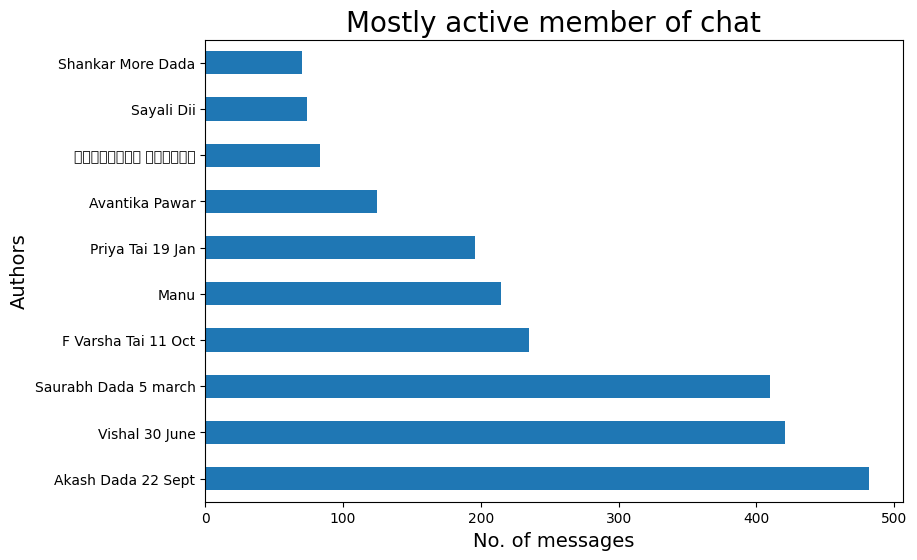

In [76]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

Step 12: Most active day in a week

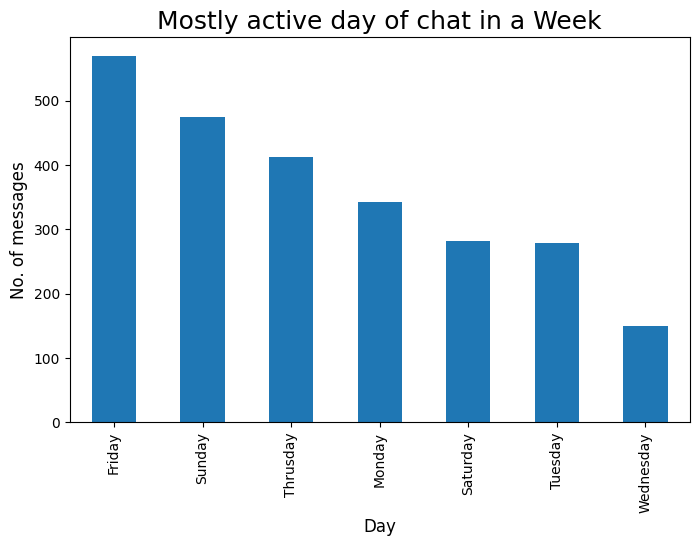

In [77]:
### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()

### ------ Most active author in the chat is : 
a_d = active_day.head(20)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

Time series analysis

Step 13: Time whenever the chat was highly active

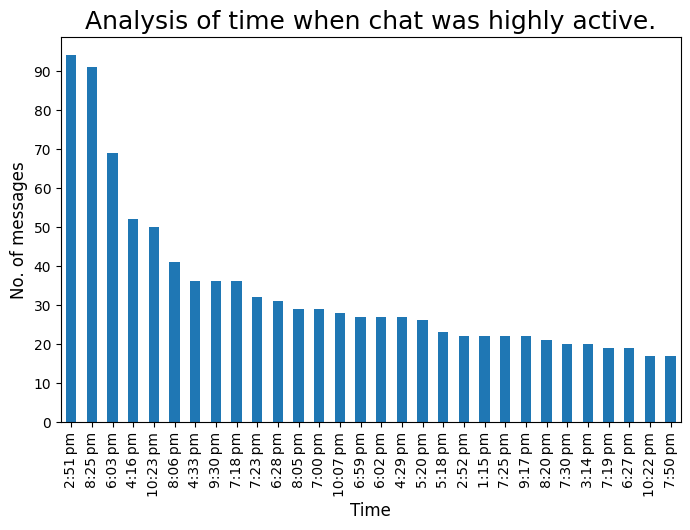

In [78]:
###------  Time whenever the chat is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(30)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [79]:
#Step 14: Date on which the chat was highly active

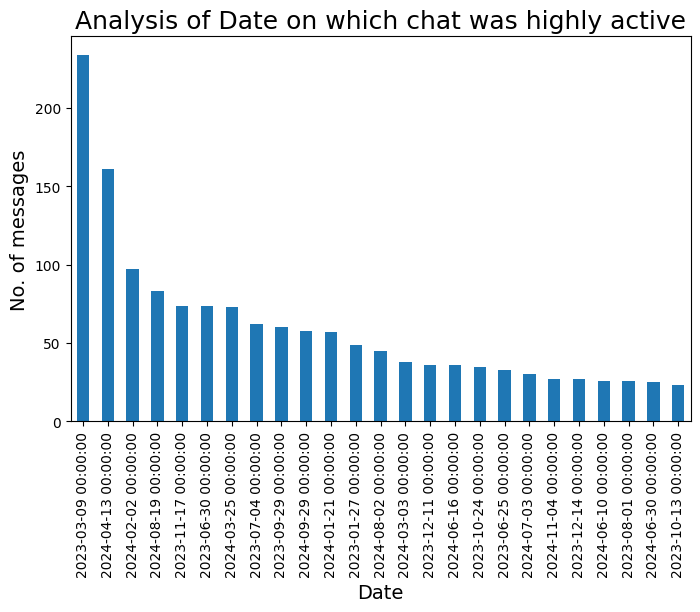

In [80]:
###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(25).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()
     

In [81]:
# converting 24 hr to 12 hr 
import pandas as pd
from datetime import datetime

lst = []
for i in df['Time']:
    try:
        # Attempt to parse with AM/PM indicator
        out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
    except ValueError:
        # If parsing fails, assume 24-hour format
        out_time = i  
    lst.append(out_time)

df['24H_Time'] = lst
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

In [84]:
#Step 16: Most suitable hour of the day whenever there will be more chances of getting a response from user

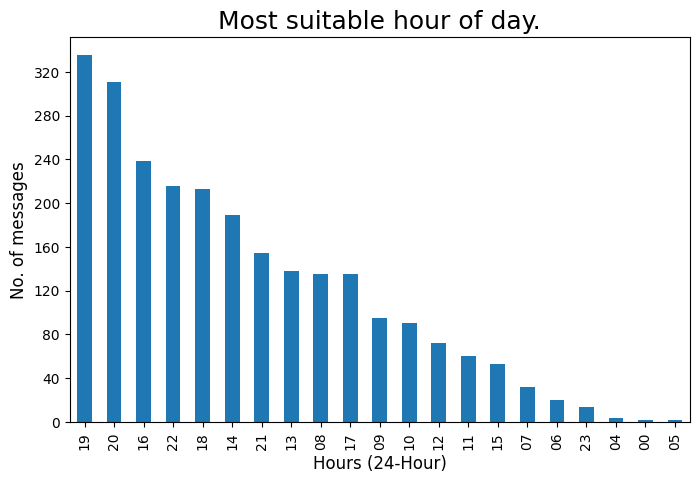

In [85]:
###------ Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(24)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()